# 연결

In [ ]:
! pip install PyMySQL

     |████████████████████████████████| 43 kB 1.7 MB/s 


In [ ]:
import pymysql.cursors

In [ ]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [ ]:
connection

In [ ]:
cursor = connection.cursor()

In [ ]:
cursor

#쿼리

In [ ]:
# 실행할 SQL 쿼리
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,M5_PRC , M10_PRC, M20_PRC
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      WHERE T1.STK_NM = '성신양회'
      AND T2.DT >= '2019-01-01'
      AND T2.DT <= '2019-02-08';
"""  

## 변환


In [ ]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

25

In [ ]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [ ]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('11200.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('12250.000'),
  'L_PRC': Decimal('11050.000'),
  'M10_PRC': Decimal('11230.000'),
  'M20_PRC': Decimal('11230.000'),
  'M5_PRC': Decimal('11540.000'),
  'O_PRC': Decimal('12200.000'),
  'SEC_NM': '건축자재',
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('926302.000')},
 {'C_PRC': Decimal('11300.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('11850.000'),
  'L_PRC': Decimal('10950.000'),
  'M10_PRC': Decimal('11315.000'),
  'M20_PRC': Decimal('11222.500'),
  'M5_PRC': Decimal('11440.000'),
  'O_PRC': Decimal('11300.000'),
  'SEC_NM': '건축자재',
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('782419.000')},
 {'C_PRC': Decimal('11150.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('11400.000'),
  'L_PRC': Decimal('10900.000'),
  'M10_PRC': Decimal('11375.000'),
  'M20_PRC': Decimal('11202.500'),
  'M5_PRC': Decimal('11430.000'),
  'O_PRC': Decimal('11250.000'

In [ ]:
import pandas as pd

In [ ]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [ ]:
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC
0,004980,성신양회,건축자재,2019-01-02,12200.000,11050.000,12250.000,11200.000,926302.000,11540.000,11230.000,11230.000
1,004980,성신양회,건축자재,2019-01-03,11300.000,10950.000,11850.000,11300.000,782419.000,11440.000,11315.000,11222.500
2,004980,성신양회,건축자재,2019-01-04,11250.000,10900.000,11400.000,11150.000,370392.000,11430.000,11375.000,11202.500
3,004980,성신양회,건축자재,2019-01-07,11550.000,11300.000,11800.000,11600.000,419191.000,11430.000,11480.000,11210.000
4,004980,성신양회,건축자재,2019-01-08,11750.000,11600.000,12800.000,12250.000,1561456.000,11500.000,11555.000,11282.500
5,004980,성신양회,건축자재,2019-01-09,12450.000,12200.000,12650.000,12600.000,667663.000,11780.000,11660.000,11330.000
6,004980,성신양회,건축자재,2019-01-10,12750.000,12250.000,13100.000,12300.000,844668.000,11980.000,11710.000,11365.000
7,004980,성신양회,건축자재,2019-01-11,12300.000,12250.000,12800.000,12750.000,738795.000,12300.000,11865.000,11442.500
8,004980,성신양회,건축자재,2019-01-14,12950.000,12550.000,13050.000,12900.000,635831.000,12560.000,11995.000,11562.500
9,004980,성신양회,건축자재,2019-01-15,12800.000,12600.000,13450.000,13100.000,1193456.000,12730.000,12115.000,11667.500


In [ ]:
# df의 컬럼타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STK_CD   25 non-null     object
 1   STK_NM   25 non-null     object
 2   SEC_NM   25 non-null     object
 3   DT       25 non-null     object
 4   O_PRC    25 non-null     object
 5   L_PRC    25 non-null     object
 6   H_PRC    25 non-null     object
 7   C_PRC    25 non-null     object
 8   VOL      25 non-null     object
 9   M5_PRC   25 non-null     object
 10  M10_PRC  25 non-null     object
 11  M20_PRC  25 non-null     object
dtypes: object(12)
memory usage: 2.5+ KB


In [ ]:
import pandas as pd
# from datetime import datetime
df1 = pd.read_csv("sungshin_m60_prc.csv", engine="python") # 삼성전자 60일 이평선이 들어간 csv
df1['60days'] = df1['c_prc']/df1['M60_PRC'] * 100 # 60일 이평선의 이격도
df['M60_PRC'] = df1['M60_PRC'] # 기존 df에 m60_prc 라는 열을 만들고 그 안에 df1에서 가져온 60일 이평선 대입
df['20days'] = df['C_PRC']/df['M20_PRC']*100 # 20일 이평선의 이격도
df['60days'] = df1['60days'] # 기존 df에 60일 이격도 대입
df1.head()

,dt,stk_nm,c_prc,M60_PRC,60days
0,2019-01-02,성신양회,11200.0,10373.333,107.969155
1,2019-01-03,성신양회,11300.0,10348.333,109.196331
2,2019-01-04,성신양회,11150.0,10323.333,108.007753
3,2019-01-07,성신양회,11600.0,10341.667,112.167603
4,2019-01-08,성신양회,12250.0,10378.333,118.034370


In [ ]:
# DT 컬럼을 날짜와 시간 타입으로 변환
df["DT"] = pd.to_datetime(df["DT"])
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC,M60_PRC,20days,60days
0,004980,성신양회,건축자재,2019-01-02,12200.000,11050.000,12250.000,11200.000,926302.000,11540.000,11230.000,11230.000,10373.333,99.73285841495992876224398931,107.969155
1,004980,성신양회,건축자재,2019-01-03,11300.000,10950.000,11850.000,11300.000,782419.000,11440.000,11315.000,11222.500,10348.333,100.6905769659166852305635999,109.196331
2,004980,성신양회,건축자재,2019-01-04,11250.000,10900.000,11400.000,11150.000,370392.000,11430.000,11375.000,11202.500,10323.333,99.53135460834635126087926802,108.007753
3,004980,성신양회,건축자재,2019-01-07,11550.000,11300.000,11800.000,11600.000,419191.000,11430.000,11480.000,11210.000,10341.667,103.4790365744870651204281891,112.167603
4,004980,성신양회,건축자재,2019-01-08,11750.000,11600.000,12800.000,12250.000,1561456.000,11500.000,11555.000,11282.500,10378.333,108.5752271216485707954797252,118.034370
5,004980,성신양회,건축자재,2019-01-09,12450.000,12200.000,12650.000,12600.000,667663.000,11780.000,11660.000,11330.000,10415.000,111.2091791703442188879082083,120.979357
6,004980,성신양회,건축자재,2019-01-10,12750.000,12250.000,13100.000,12300.000,844668.000,11980.000,11710.000,11365.000,10453.333,108.2270127584689837219533656,117.665820
7,004980,성신양회,건축자재,2019-01-11,12300.000,12250.000,12800.000,12750.000,738795.000,12300.000,11865.000,11442.500,10493.333,111.4266987109460345204282281,121.505722
8,004980,성신양회,건축자재,2019-01-14,12950.000,12550.000,13050.000,12900.000,635831.000,12560.000,11995.000,11562.500,10527.500,111.5675675675675675675675676,122.536215
9,004980,성신양회,건축자재,2019-01-15,12800.000,12600.000,13450.000,13100.000,1193456.000,12730.000,12115.000,11667.500,10566.667,112.2776944503964002571244911,123.974759


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STK_CD   25 non-null     object        
 1   STK_NM   25 non-null     object        
 2   SEC_NM   25 non-null     object        
 3   DT       25 non-null     datetime64[ns]
 4   O_PRC    25 non-null     object        
 5   L_PRC    25 non-null     object        
 6   H_PRC    25 non-null     object        
 7   C_PRC    25 non-null     object        
 8   VOL      25 non-null     object        
 9   M5_PRC   25 non-null     object        
 10  M10_PRC  25 non-null     object        
 11  M20_PRC  25 non-null     object        
 12  M60_PRC  25 non-null     float64       
 13  20days   25 non-null     object        
 14  60days   25 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 3.1+ KB


In [ ]:
# O_PRC 컬럼부터 마지막 컬럼까지 정수로 변환
df.loc[: , "O_PRC":] = df.loc[: , "O_PRC":].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STK_CD   25 non-null     object        
 1   STK_NM   25 non-null     object        
 2   SEC_NM   25 non-null     object        
 3   DT       25 non-null     datetime64[ns]
 4   O_PRC    25 non-null     int64         
 5   L_PRC    25 non-null     int64         
 6   H_PRC    25 non-null     int64         
 7   C_PRC    25 non-null     int64         
 8   VOL      25 non-null     int64         
 9   M5_PRC   25 non-null     int64         
 10  M10_PRC  25 non-null     int64         
 11  M20_PRC  25 non-null     int64         
 12  M60_PRC  25 non-null     int64         
 13  20days   25 non-null     int64         
 14  60days   25 non-null     int64         
dtypes: datetime64[ns](1), int64(11), object(3)
memory usage: 3.1+ KB


In [ ]:
! pip install plotly==5.2.1

     |████████████████████████████████| 21.8 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objects as go

In [ ]:
import plotly.subplots as ms

## 차트


In [ ]:
# 봉차트로 시각화
candle = go.Candlestick(
        x=df.DT,              #날짜
        open=df['O_PRC'],      # 시가
        high=df['H_PRC'],     #고가
        low=df['L_PRC'],       #저가
        close=df['C_PRC'],   # 종가
        increasing_line_color='red', # 상승봉의 색 설정
	      decreasing_line_color='blue' # 하락봉의 색 설정
)

# 바 차트(거래량) 객체 생성
volume_bar = go.Bar(x=df.DT, y=df['VOL'], name='Volume')

# 5일 이동 평균 선 차트 
ma5 = go.Scatter(x=df.DT, y=df['M5_PRC'], line=dict(color='black', width=0.8), name='ma5')
# 10일 이동 평균 선 차트 
ma10 = go.Scatter(x=df.DT, y=df['M10_PRC'], line=dict(color='red', width=0.9), name='ma10')
# 20일 이동 평균 선 차트 
ma20 = go.Scatter(x=df.DT, y=df['M20_PRC'], line=dict(color='green', width=1), name='ma20')
# 60일 이동 평균 선 차트
ma60 = go.Scatter(x=df.DT, y=df['M60_PRC'], line=dict(color='purple', width=2), name='ma60')
# 20일 이격도 차트
day20 = go.Scatter(x=df.DT, y=df['20days'], line=dict(color='green', width=2), name='day20')
# 60일 이격도 차트
day60 = go.Scatter(x=df.DT, y=df['60days'], line=dict(color='purple', width=2), name='day60')

In [ ]:
# 2줄 1칸 차트를 생성
# x축은 공유함
fig = ms.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# row=1, col=1 : 1번째줄 1번째 칸에 candle 차트 출력
fig.add_trace(candle, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma5 차트 출력
fig.add_trace(ma5, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma10 차트 출력
fig.add_trace(ma10, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma20 차트 출력
fig.add_trace(ma20, row=1, col=1)
# orw=1, col=1 : 1번째 줄 1번째 칸에 ma60 차트 출력
fig.add_trace(ma60, row=1, col=1)

# row=2, col=1 : 2번째줄 1번째 칸에 volume_bar 차트 출력
fig.add_trace(volume_bar, row=2, col=1)

In [32]:
# 2줄 1칸 차트를 생성
# x축은 공유함
fig = ms.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# row=1, col=1 : 1번째줄 1번째 칸에 candle 차트 출력
fig.add_trace(candle, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma5 차트 출력
fig.add_trace(ma5, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma10 차트 출력
fig.add_trace(ma10, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma20 차트 출력
fig.add_trace(ma20, row=1, col=1)
# orw=1, col=1 : 1번째 줄 1번째 칸에 ma60 차트 출력
fig.add_trace(ma60, row=1, col=1)

# row=2, col=1 : 2번째줄 1번째 칸에 volume_bar 차트 출력
fig.add_trace(volume_bar, row=2, col=1)

# row=3, col=1 : 3번째줄 1번째 칸에 20days 차트 출력
fig.add_trace(day20, row=3, col=1)
# row=3, col=1 : 3번째줄 1번째 칸에 60days 차트 출력
fig.add_trace(day60, row=3, col=1)
# 이평선 90 이하일 때 매수
fig.add_hline(y=90, line=dict(color='green', width=2), name='cutline90') 
# 이평선 110 이상일 때 매도
fig.add_hline(y=110, line=dict(color='red', width=2), name='cutline110') 

# row=1, col=1 : 1번째줄 1번째 칸에 "주가" 제목 출력
fig.update_yaxes(title_text="주가", row=1, col=1)
# row=2, col=1 : 2번째줄 1번째 칸에 "거래량" 제목 출력
fig.update_yaxes(title_text="거래량", row=2, col=1)
# row=3, col=1 : 3번째줄 1번째 칸에 "이격도" 제목 출력
fig.update_yaxes(title_text="이격도", row=3, col=1)

# 삼성전자 제목 출력
fig.update_layout( title='성신양회')

#최종

In [42]:
# 2줄 1칸 차트를 생성
# x축은 공유함
fig = ms.make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# row=3, col=1 : 3번째줄 1번째 칸에 20days 차트 출력
fig.add_trace(day20, row=1, col=1)
# row=3, col=1 : 3번째줄 1번째 칸에 60days 차트 출력
fig.add_trace(day60, row=1, col=1)
# 이평선 90 이하일 때 매수
fig.add_hline(y=90, line=dict(color='green', width=2), name='cutline90') 
# 이평선 110 이상일 때 매도
fig.add_hline(y=110, line=dict(color='red', width=2), name='cutline110') 

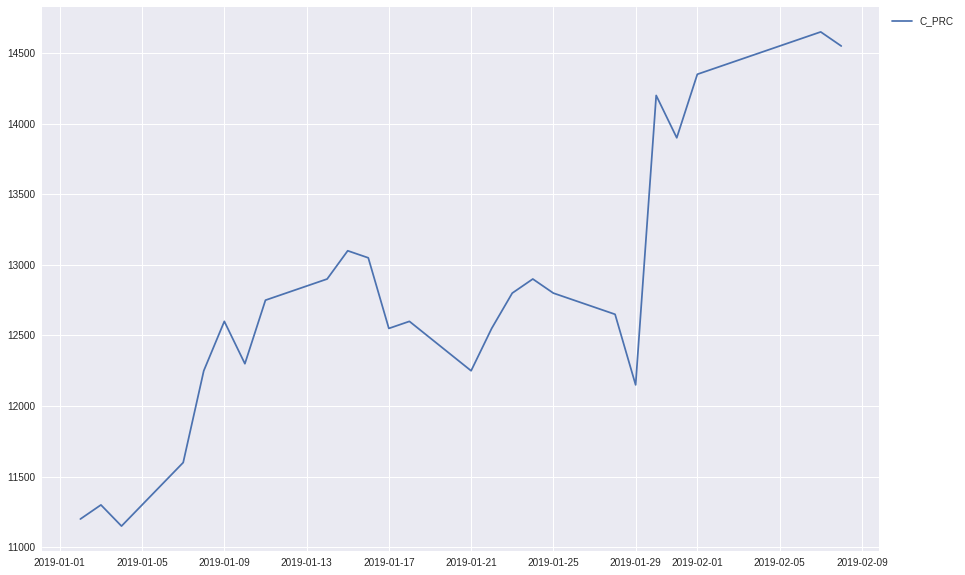

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

plt.figure(figsize=(15, 10))
plt.plot(df['DT'], df['C_PRC'], label = 'C_PRC')
plt.legend(bbox_to_anchor=(1.1, 1), fontsize = 10)